In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (2).csv


In [29]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "iris.csv" with length 3975 bytes


In [30]:
uploaded

{'iris.csv': b'"sepal.length","sepal.width","petal.length","petal.width","variety"\n5.1,3.5,1.4,.2,"Setosa"\n4.9,3,1.4,.2,"Setosa"\n4.7,3.2,1.3,.2,"Setosa"\n4.6,3.1,1.5,.2,"Setosa"\n5,3.6,1.4,.2,"Setosa"\n5.4,3.9,1.7,.4,"Setosa"\n4.6,3.4,1.4,.3,"Setosa"\n5,3.4,1.5,.2,"Setosa"\n4.4,2.9,1.4,.2,"Setosa"\n4.9,3.1,1.5,.1,"Setosa"\n5.4,3.7,1.5,.2,"Setosa"\n4.8,3.4,1.6,.2,"Setosa"\n4.8,3,1.4,.1,"Setosa"\n4.3,3,1.1,.1,"Setosa"\n5.8,4,1.2,.2,"Setosa"\n5.7,4.4,1.5,.4,"Setosa"\n5.4,3.9,1.3,.4,"Setosa"\n5.1,3.5,1.4,.3,"Setosa"\n5.7,3.8,1.7,.3,"Setosa"\n5.1,3.8,1.5,.3,"Setosa"\n5.4,3.4,1.7,.2,"Setosa"\n5.1,3.7,1.5,.4,"Setosa"\n4.6,3.6,1,.2,"Setosa"\n5.1,3.3,1.7,.5,"Setosa"\n4.8,3.4,1.9,.2,"Setosa"\n5,3,1.6,.2,"Setosa"\n5,3.4,1.6,.4,"Setosa"\n5.2,3.5,1.5,.2,"Setosa"\n5.2,3.4,1.4,.2,"Setosa"\n4.7,3.2,1.6,.2,"Setosa"\n4.8,3.1,1.6,.2,"Setosa"\n5.4,3.4,1.5,.4,"Setosa"\n5.2,4.1,1.5,.1,"Setosa"\n5.5,4.2,1.4,.2,"Setosa"\n4.9,3.1,1.5,.2,"Setosa"\n5,3.2,1.2,.2,"Setosa"\n5.5,3.5,1.3,.2,"Setosa"\n4.9,3.6,1.4,.

In [31]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

In [32]:
data_iris = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
data_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [33]:
data_iris['variety'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


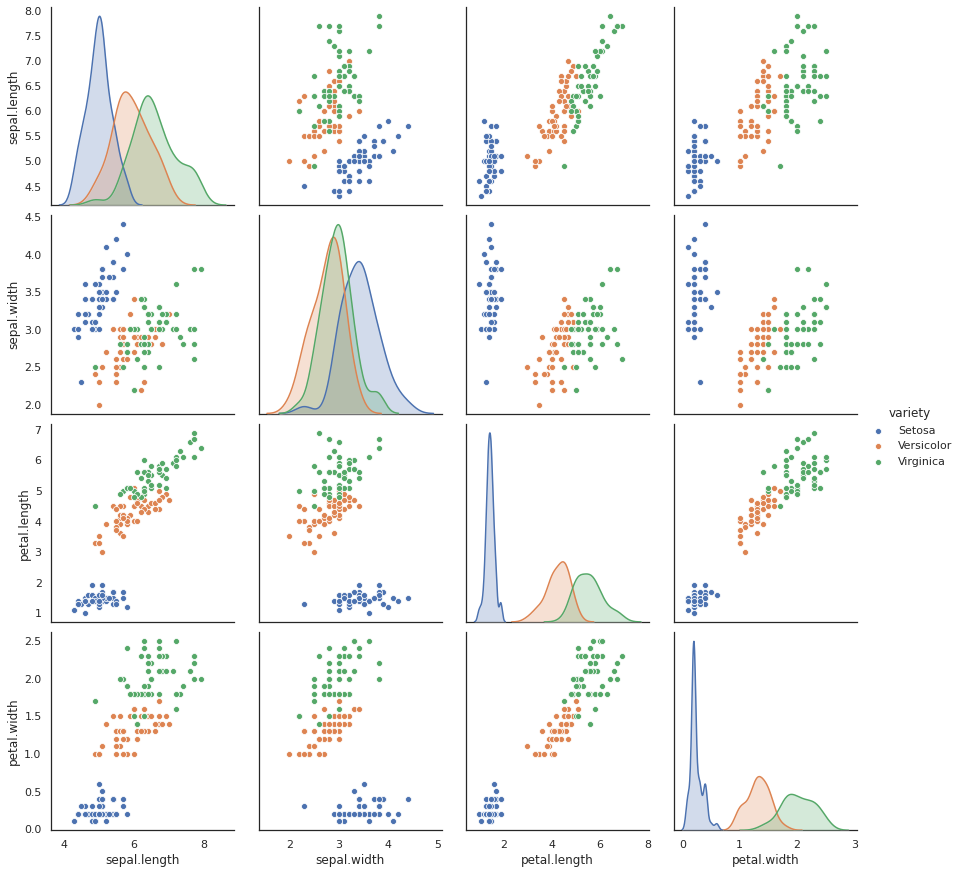

In [34]:
sns.pairplot(data_iris, hue="variety", size=3)

In [35]:
variety = ['Setosa', 'Versicolor', 'Virginica']

m = data_iris.shape[0]      # Number of examples

n = 4                       # Features

k = 3                       # Number of classes

X = np.ones((m,n + 1))
y = np.array((m,1))

X[:,1] = data_iris['petal.length'].values
X[:,2] = data_iris['petal.width'].values
X[:,3] = data_iris['sepal.length'].values
X[:,4] = data_iris['sepal.width'].values

# Labels
y = data_iris['variety'].values

for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
X = data_iris.drop([ 'variety'], axis=1)
y = data_iris['variety']
print(X_train.shape)
print(y_test.shape)

(120, 5)
(30,)


In [37]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [38]:
def reglrCostFunction(theta, X, y, lambda_s = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    reg = (lambda_s/(2 * m)) * np.sum(theta**2)
    J = J + reg
 
    return J

In [39]:
def reglrGradient(theta, X, y, lambda_s = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = lambda_s * theta /m
    gd = ((1 / m) * X.T.dot(h - y)) 
    gd = gd + reg

    return gd

In [40]:
def logisticRegression(X, y, theta):
    result = op.minimize(fun = reglrCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = reglrGradient)
    
    return result.x

In [41]:
from scipy import optimize as op
all_theta = np.zeros((k, n + 1))
i = 0
for flower in variety:
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [42]:
def accuracy(y_test, pred):
  return (y_test==pred).mean()
  
Prob = sigmoid(X_test.dot(all_theta.T)) 
pred = [variety[np.argmax(Prob[i, :])] for i in range(X_test.shape[0])]

print(" Test Accuracy ", accuracy(y_test, pred) * 100 , '%')

 Test Accuracy  96.66666666666667 %
